In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

def load_idx(file_path):
    with open(file_path, 'rb') as f:
        _ = int.from_bytes(f.read(4), byteorder='big')  # Magic number (not used)
        num_items = int.from_bytes(f.read(4), byteorder='big')
        
        # Check if images or labels by reading dimensions
        if 'images' in file_path:
            num_rows = int.from_bytes(f.read(4), byteorder='big')
            num_cols = int.from_bytes(f.read(4), byteorder='big')
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_items, num_rows, num_cols)
        elif 'labels' in file_path:
            data = np.frombuffer(f.read(), dtype=np.uint8)
    return data

In [3]:
# Paths to your IDX files (modify as needed if paths differ)
train_images_path = 'New folder/train-images.idx3-ubyte'
train_labels_path = 'New folder/train-labels.idx1-ubyte'
test_images_path = 'New folder/t10k-images.idx3-ubyte'
test_labels_path = 'New folder/t10k-labels.idx1-ubyte'

# Load training and test images and labels
train_images = load_idx(train_images_path)
train_labels = load_idx(train_labels_path)
test_images = load_idx(test_images_path)
test_labels = load_idx(test_labels_path)

# Normalize pixel values and add a channel dimension for compatibility with CNN input
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Print shapes to verify
print("Training data shape:", train_images.shape, train_labels.shape)
print("Test data shape:", test_images.shape, test_labels.shape)

Training data shape: (60000, 28, 28, 1) (60000,)
Test data shape: (10000, 28, 28, 1) (10000,)


In [4]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Define the input shape here
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.8979 - loss: 0.3256 - val_accuracy: 0.9871 - val_loss: 0.0398
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9855 - loss: 0.0467 - val_accuracy: 0.9879 - val_loss: 0.0352
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9902 - loss: 0.0296 - val_accuracy: 0.9906 - val_loss: 0.0326
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9926 - loss: 0.0223 - val_accuracy: 0.9892 - val_loss: 0.0342
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9942 - loss: 0.0177 - val_accuracy: 0.9923 - val_loss: 0.0265


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 7ms/step - accuracy: 0.9923 - loss: 0.0265

Test accuracy: 0.9922999739646912


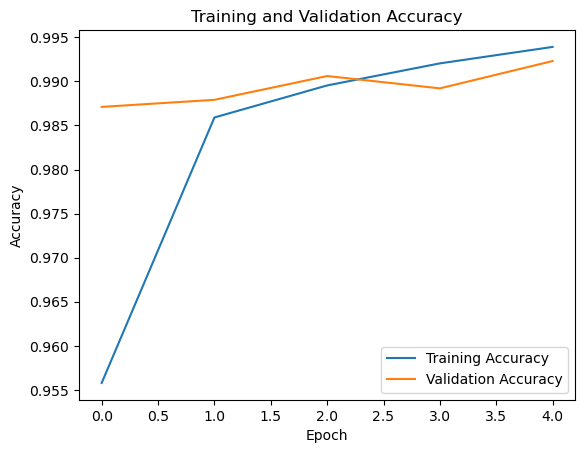

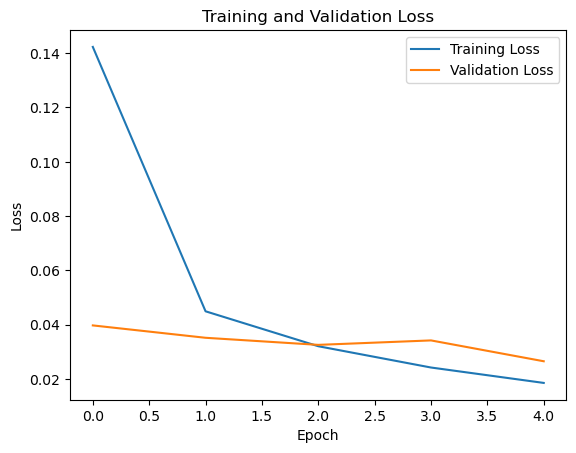

In [7]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
predictions = model.predict(test_images)
print(f"Predicted label: {np.argmax(predictions[0])}")
print(f"True label: {test_labels[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Predicted label: 7
True label: 7
